In [1]:

import sys
sys.path.append("../src")

from model import split_data, train_logistic_regression, train_random_forest, evaluate_model, save_model,train_xgboost

import pandas as pd
import os


In [2]:

processed_path = "../data/processed/cleaned_titanic.csv"
df = pd.read_csv(processed_path)

print("Processed Data Shape:", df.shape)
df.head()


Processed Data Shape: (891, 12)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,0,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,1,2,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,1,2,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,0,1,1


In [3]:
# Drop Name column (string) before training
df = df.drop(columns=["Name"])


In [4]:
X_train, X_test, y_train, y_test = split_data(df)


In [5]:
# Logistic Regression
log_model = train_logistic_regression(X_train, y_train)




In [6]:
log_results = evaluate_model(log_model, X_train, y_train, X_test, y_test)
print("Logistic Regression Results:")
print("Train Accuracy:", log_results['train_acc'])
print("Test Accuracy:", log_results['test_acc'])

Logistic Regression Results:
Train Accuracy: 0.8160112359550562
Test Accuracy: 0.8156424581005587


In [7]:
rf_model = train_random_forest(X_train, y_train)

In [8]:
rf_results = evaluate_model(rf_model, X_train, y_train, X_test, y_test)
print("Random Forest Results:")
print("Train Accuracy:", rf_results['train_acc'])
print("Test Accuracy:", rf_results['test_acc'])

Random Forest Results:
Train Accuracy: 0.9873595505617978
Test Accuracy: 0.8212290502793296


In [9]:
# Train XGBoost
xgb_model = train_xgboost(X_train, y_train)

# Evaluate XGBoost



c:\Users\Pc World\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:53:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [10]:
xgb_results = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)
print("XGBoost Results:")
print("Train Accuracy:", xgb_results['train_acc'])
print("Test Accuracy:", xgb_results['test_acc'])

XGBoost Results:
Train Accuracy: 0.9030898876404494
Test Accuracy: 0.8547486033519553


                 Model  Test Accuracy
0  Logistic Regression       0.815642
1        Random Forest       0.821229
2              XGBoost       0.854749


<Axes: xlabel='Model'>

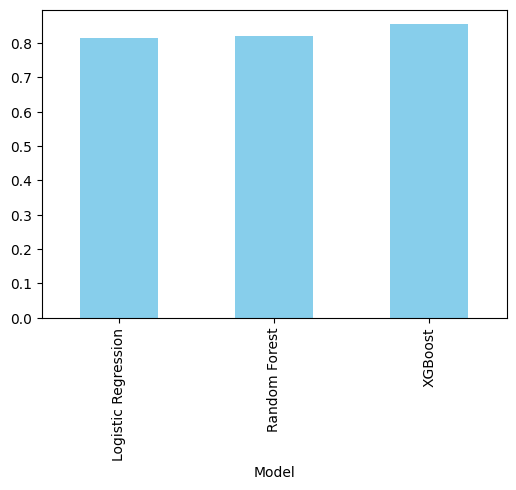

In [11]:
results = {
    "Logistic Regression": log_results['test_acc'],
    "Random Forest": rf_results['test_acc'],
    "XGBoost": xgb_results['test_acc']
}

import pandas as pd
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Test Accuracy"])
print(results_df)


results_df.plot(kind="bar", x="Model", y="Test Accuracy", legend=False, color="skyblue", figsize=(6,4))


In [12]:
best_model = xgb_model 
save_model(best_model, "../models/final_model.pkl")

Model saved to ../models/final_model.pkl


      Feature  Importance
7       Title    0.549538
0      Pclass    0.166722
8  FamilySize    0.090120
5        Fare    0.045096
4       Parch    0.041988
2         Age    0.034625
6    Embarked    0.034271
3       SibSp    0.019817
1         Sex    0.017824
9     IsAlone    0.000000


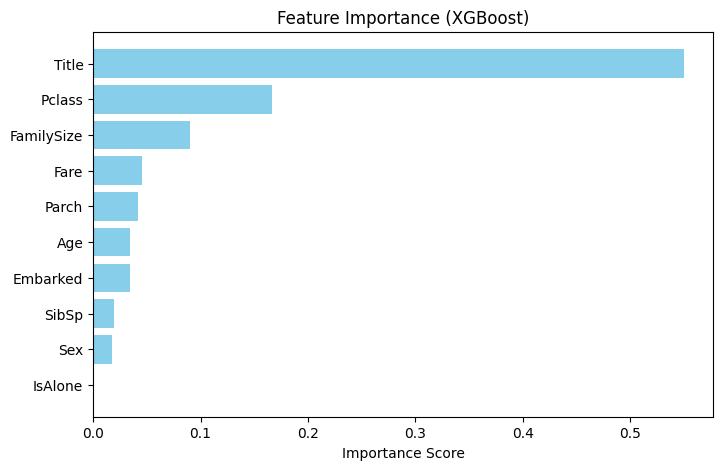

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming xgb_model is your trained model and X_train is your feature set
feature_importances = xgb_model.feature_importances_

# Create a DataFrame
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display
print(importance_df)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.show()
